In [2]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import sqrt
from scipy.optimize import curve_fit
from scipy.stats import multivariate_normal
from scipy.constants import pi
import pdb

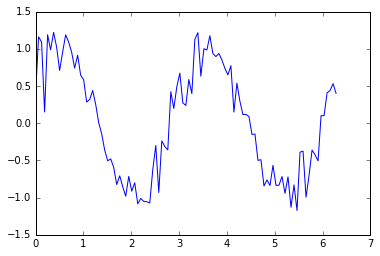

In [15]:
"""Program uses a sine function to curve fit data, returning the best-fit k and phi values."""

%matplotlib inline

####################################################################################################

def g(x, k, phi):     #Signal
    return (np.sin(k*x + phi))

####################################################################################################

x = np.linspace(0, 2*pi, 101)
k = 2.     #Fitting parameter.
phi = pi/6.     #Fitting Parameter.
err_floor = 0.1     #Makes it variance doesn't become arbitrarily small.
meas_err = np.cos(x)*0.2
var = err_floor**2 + meas_err**2     #Adding in quadriture.
unc = sqrt(var)
y = g(x, k, phi) + np.random.randn(x.shape[0])*unc     #Signal with noise added with a 5:1 Signal-to-Noise ratio

# print(meas_err, err_floor, var, unc)

coeffs, cov = curve_fit(g, x, y, p0 = [k, phi])
k_best = coeffs[0]
phi_best = coeffs[1]

plt.figure()
plt.plot(x, y)
plt.show()

####################################################################################################



Best-fit polynomial coefficients: [0.769 -0.827 7.526 -13.260 8.865 -2.893 0.496 -0.043 0.001]

The covariance matrix:
[[0.026 -0.165 0.335 -0.318 0.163 -0.048 0.008 -0.001 0.000]
 [-0.165 1.553 -3.672 3.783 -2.049 0.627 -0.109 0.010 -0.000]
 [0.335 -3.672 9.359 -10.098 5.642 -1.767 0.313 -0.029 0.001]
 [-0.318 3.783 -10.098 11.236 -6.418 2.044 -0.367 0.035 -0.001]
 [0.163 -2.049 5.642 -6.418 3.728 -1.203 0.218 -0.021 0.001]
 [-0.048 0.627 -1.767 2.044 -1.203 0.392 -0.072 0.007 -0.000]
 [0.008 -0.109 0.313 -0.367 0.218 -0.072 0.013 -0.001 0.000]
 [-0.001 0.010 -0.029 0.035 -0.021 0.007 -0.001 0.000 -0.000]
 [0.000 -0.000 0.001 -0.001 0.001 -0.000 0.000 -0.000 0.000]]

chi2, chi2_nu, DOF are 138.400, 1.504, 92, respectively.

Best-fit c0 (coeff of the constant term) is: 0.769 +/- 0.162
Best-fit c1 (coeff of the linear term) is: -0.827 +/- 1.246

The c2 and c3 terms are the most negatively correlated (anti-correlated), with their covariance = -10.098
The c2 and c4 terms are the most posi

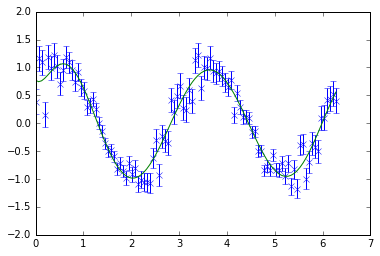

In [16]:
"""Program takes unknown data and uses an 8th-order polynomial model to fit the data.  From this model, the program calculates the best-fit polynomial coefficients, 
covariance matrix, Chi-Square, Reduced Chi-Square, and correlations(positive, negative, least) between coefficients.  The program calculates and indicates what the 
best-fit values are for the c0 and c1 and their errors.  The program plots the best-fit curve and overlays the data onto the plot, along with data error bars."""

%matplotlib inline

def y_poly(x, c0, c1, c2, c3, c4, c5, c6, c7, c8):     #Model used to fit previous data
    y_model = c0 + c1*x + c2*x**2 + c3*x**3 + c4*x**4 + c5*x**5 + c6*x**6 + c7*x**7 + c8*x**8
    return y_model

coeffs1, cov1 = curve_fit(y_poly, x, y)
best_fit = np.array([i for i in coeffs1])

DOF = len(y) - len(coeffs1)     #Degrees of freedom.
chi2 = (((y - y_poly(x, *best_fit))/unc)**2).sum()     #Chi-square.
chi2_nu = chi2/DOF     #Reduced Chi-square.

unc_c0 = cov1[0,0]**.5
unc_c1 = cov1[1,1]**.5

triu_cov1 = np.triu(cov1, k=1)     #Only the upper triangle of the covariance matrix.  k=1 to avoid the diagonal.

triu_cov1_pos = np.where(triu_cov1 == triu_cov1.max())     #Most positive correlation between coefficients.
triu_cov1_neg = np.where(triu_cov1 == triu_cov1.min())     #Most negative correlation between coefficients.

triu_cov1_abs = abs(triu_cov1) + 1e6*abs(np.tril(cov1))     #Added large number to lower triangle and main diagonal in order to retrieve value closest to zero in the upper triangle.
triu_cov1_least = np.where(triu_cov1_abs == triu_cov1_abs.min())     #Least correlation between coefficients.

np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})     #Formats print statement correctly using lambda function

print("Best-fit polynomial coefficients: {}".format(best_fit))

print("\nThe covariance matrix:\n{}".format(cov1))

print("\nchi2, chi2_nu, DOF are {:.3f}, {:.3f}, {:2d}, respectively.".format(chi2, chi2_nu, DOF))

print("\nBest-fit c0 (coeff of the constant term) is: {:.3f} +/- {:.3f}".format(coeffs1[0], unc_c0))
print("Best-fit c1 (coeff of the linear term) is: {:.3f} +/- {:.3f}".format(coeffs1[1], unc_c1))

print("\nThe c{:} and c{:} terms are the most negatively correlated (anti-correlated), with their covariance = {:.3f}".format(triu_cov1_neg[0][0], triu_cov1_neg[1][0], cov1[triu_cov1_neg][0]))
print("The c{:} and c{:} terms are the most positively correlated, with their covariance = {:.3f}".format(triu_cov1_pos[0][0], triu_cov1_pos[1][0], cov1[triu_cov1_pos][0]))
print("The c{:} and c{:} terms are the least correlated, with their covariance = {:.2e}".format(triu_cov1_least[0][0], triu_cov1_least[1][0], cov1[triu_cov1_least][0]))

plt.errorbar(x, y, yerr = unc, fmt = 'x')     #Plots error bars
plt.plot(x, y_poly(x, *coeffs1))
plt.ylim(-2, 2)
plt.show()